<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Multi_Perceptron_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

x_train shape:  (60000, 28, 28)
x_test (10000, 28, 28)

train label:  [5 0 4 ... 5 6 8]
test label:  [7 2 1 ... 4 5 6]


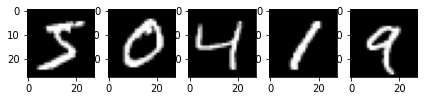

In [38]:
(x_train,t_train), (x_test,t_test) = mnist.load_data()

print('x_train shape: ', x_train.shape)
print('x_test', x_test.shape)

# 결과데이터
print('\ntrain label: ', t_train)
print('test label: ', t_test)

# 일부이미지 출력

plt.figure(figsize=(7,7))

for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(x_train[i], cmap = 'gray')

plt.show()

# 데이터 전처리

In [39]:
# 데이터 정규화 
# 입력데이터에 대해 진행한다 
# 0~1사이의 값을 갖도록 함, MinMiax알고리즘
x_train = (x_train  - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)



print('t_test 원본값: \n',t_test)
# onehot encoding
# 출력데이터에 대해 진행한다
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10) # num_classes - 출력값이 0~9까지이므로 10개로 설정 
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

print('\n t_test onehot으로 변환한값: \n',t_test)

t_test 원본값: 
 [7 2 1 ... 4 5 6]

 t_test onehot으로 변환한값: 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 모델구축

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델컴파일

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


모델 학습

In [44]:
hist = model.fit(x_train, t_train, epochs = 30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5165 - accuracy: 0.8527 - val_loss: 0.1959 - val_accuracy: 0.9429
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1521 - accuracy: 0.9550 - val_loss: 0.1397 - val_accuracy: 0.9592
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1028 - accuracy: 0.9702 - val_loss: 0.1227 - val_accuracy: 0.9649
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0763 - accuracy: 0.9778 - val_loss: 0.1049 - val_accuracy: 0.9687
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0577 - accuracy: 0.9838 - val_loss: 0.1022 - val_accuracy: 0.9699
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0483 - accuracy: 0.9860 - val_loss: 0.1049 - val_accuracy: 0.9692
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.1108 - val_accuracy:

# 모델평가

In [45]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1378 - accuracy: 0.9748


[0.13784654438495636, 0.9747999906539917]